# Business Problem

#### XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

####  Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users


In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#input data files
pathfile1="C:\Jupyter\Cab_Data.csv"
pathfile2="C:\Jupyter\City.csv"
pathfile3="C:\Jupyter\Customer_ID.csv"
pathfile4="C:\Jupyter\Transaction_ID.csv"

In [41]:
# Import following python libraries to utilize in EDA process.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

## Importing Datasets

In [42]:
CabData = pd.read_csv('\Jupyter\Cab_Data.csv')
City = pd.read_csv('C:\Jupyter\City.csv')
CustomerID = pd.read_csv('C:\Jupyter\Customer_ID.csv')
TransactionID = pd.read_csv('C:\Jupyter\Transaction_ID.csv')

In [43]:
CabData.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,1/7/2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,1/3/2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,1/7/2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,1/12/2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,1/6/2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [7]:
CustomerID.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [44]:
TransactionID.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [45]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [46]:
CabData.info()
CustomerID.info()
TransactionID.info()
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [47]:
print(CabData.describe())
print(CustomerID.describe())
print(TransactionID.describe())
print(City.describe())

       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000

### We have no missing values from the data

## Creating Master Data

In [48]:
# Merging 4 files into one MasterData.
MasterData = CabData.merge(TransactionID, on= 'Transaction ID').merge(CustomerID, on ='Customer ID').merge(City, on = 'City')
missing_value = 0
for column in MasterData.columns :
    missing_value += MasterData[column].isna().sum() + MasterData[column].isnull().sum()
print('MasterData dataset has {} entries , {} features and {} missing values'.format(MasterData.shape[0] ,MasterData.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(MasterData.dtypes))
MasterData.head(10)

MasterData dataset has 359392 entries , 14 features and 0 missing values

Feature's datatypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,5/4/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,9/21/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,6/23/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


## Data Wrangling

In [49]:
#replacing ',' with '_' in column names 

for column in MasterData.columns:
    if ' ' in column:
        MasterData = MasterData.rename(columns={column:column.replace(' ','_')})
        
for column in ["Population","Users"] :
    
        MasterData[column] = MasterData[column].str.replace(',','')
        
MasterData.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,5/4/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,9/21/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,6/23/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [50]:
# formatting of columns in appropriate format

MasterData['Date_of_Travel'] = pd.to_datetime(MasterData['Date_of_Travel'])

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        MasterData[column] = MasterData[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        MasterData[column] = MasterData[column].astype('int64')
        
print("\nFeature's datatypes\n\n{}".format(MasterData.dtypes))


Feature's datatypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income_(USD/Month)             int64
Population                     int64
Users                          int64
dtype: object


In [51]:
# Additional info
MasterData['Year'] = MasterData['Date_of_Travel'].dt.year
MasterData['Month'] = MasterData['Date_of_Travel'].dt.month
MasterData['Profit'] = MasterData['Price_Charged'] - MasterData['Cost_of_Trip']
MasterData['Profit_Rate'] = ((MasterData['Price_Charged'] - MasterData['Cost_of_Trip'])/MasterData['Cost_of_Trip'])*100
MasterData['Profit_per_KM'] = MasterData['Profit']/ MasterData['KM_Travelled']
MasterData['User_Ratio'] = MasterData['Users']/MasterData['Population']*100
MasterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Customer_ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income_(USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

# Exploratoray Data Analysis

In [52]:
# Normalizing the Master Data into two datasets 'Pink Cab' & 'Yellow Cab'
Pink_MasterData = MasterData [MasterData['Company'] == 'Pink Cab'] 
Yellow_MasterData = MasterData [MasterData['Company'] == 'Yellow Cab']
selected_columns = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users']

In [53]:
# Statistical Summary of Pink Cab Firm
filtered_Pink_MasterData = Pink_MasterData[selected_columns]
Pink_Cab_StatsInfo = filtered_Pink_MasterData.describe()
Pink_Cab_StatsInfo

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [54]:
# Statistical Summary of Yellow Cab Firm
filtered_Yellow_MasterData = Yellow_MasterData[selected_columns]
Yellow_Cab_StatsInfo = filtered_Yellow_MasterData.describe()
Yellow_Cab_StatsInfo

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


In [55]:
# Highlight Outliers and Interquartile range
def showIQRstats(dataFrame_statsinfo,column_name):
    
    mean   = dataFrame_statsinfo[column_name][1]
    median = dataFrame_statsinfo[column_name][5]
    median_mean_ratio = median/mean
    Q1     = dataFrame_statsinfo[column_name][4]
    Q3     = dataFrame_statsinfo[column_name][6]
    IQR    = Q3-Q1
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    
    print('\n\n' + "mean of : " + str(column_name) + " is " + str(mean) +
          '\n' + "median of : " + str(column_name) + " is " + str(median) +
          '\n' + "median/mean ratio of : " +  str(column_name) + " is " + str(median_mean_ratio) +
          '\n' + "Q1 value of : "  + str(column_name) + " is "  + str(Q1) +
          '\n' + "Q3 value of : "  + str(column_name) + " is "  + str(Q3) + 
          '\n' + "IQR value of : " + str(column_name) + " is " + str(IQR) + 
          '\n' + "Upper and Lower Limits of " + str(column_name) + " is "  + str((lower_band,upper_band))
         )
    
    return upper_band , lower_band

In [56]:
print('Statistical infos of Pink Cab Firm :')
for column_name in selected_columns :
    upper_band , lower_band = showIQRstats(Pink_Cab_StatsInfo , column_name)
    outliers = filtered_Pink_MasterData[(filtered_Pink_MasterData[column_name] < lower_band) | (filtered_Pink_MasterData[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Statistical infos of Pink Cab Firm :


mean of : KM_Travelled is 22.559916775861275
median of : KM_Travelled is 22.44
median/mean ratio of : KM_Travelled is 0.9946845204681968
Q1 value of : KM_Travelled is 12.0
Q3 value of : KM_Travelled is 32.96
IQR value of : KM_Travelled is 20.96
Upper and Lower Limits of KM_Travelled is (-19.44, 64.4)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 310.80085620521635
median of : Price_Charged is 298.06
median/mean ratio of : Price_Charged is 0.9590063670969948
Q1 value of : Price_Charged is 159.97
Q3 value of : Price_Charged is 441.505
IQR value of : Price_Charged is 281.53499999999997
Upper and Lower Limits of Price_Charged is (-262.3325, 863.8074999999999)

Price_Charged has 237 outliers : [ 902.65  870.48  896.35  901.07  869.94  891.22  901.71 1078.86  953.
  885.4   880.62  903.42  905.8   889.1  1105.72  880.57  910.33  954.04
  997.84 1021.72  983.99  870.29 1022.59

In [57]:
print('Statistical infos of Yellow Cab Firm :')
for column_name in selected_columns :
    upper_band , lower_band = showIQRstats(Yellow_Cab_StatsInfo , column_name)
    outliers = filtered_Yellow_MasterData[(filtered_Yellow_MasterData[column_name] < lower_band) | (filtered_Yellow_MasterData[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Statistical infos of Yellow Cab Firm :


mean of : KM_Travelled is 22.56951689414197
median of : KM_Travelled is 22.44
median/mean ratio of : KM_Travelled is 0.9942614237269923
Q1 value of : KM_Travelled is 11.99
Q3 value of : KM_Travelled is 32.96
IQR value of : KM_Travelled is 20.97
Upper and Lower Limits of KM_Travelled is (-19.464999999999996, 64.41499999999999)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 458.1819899811058
median of : Price_Charged is 425.06
median/mean ratio of : Price_Charged is 0.9277099696073352
Q1 value of : Price_Charged is 226.68
Q3 value of : Price_Charged is 633.88
IQR value of : Price_Charged is 407.2
Upper and Lower Limits of Price_Charged is (-384.11999999999995, 1244.6799999999998)

Price_Charged has 3240 outliers : [1341.17 1412.06 1540.61 ... 1282.89 1385.05 1406.5 ]


**********************************************************



mean of : Cost_of_Trip is 297.92200414007

### What are the attributes of these customer segments?

<AxesSubplot:xlabel='Income_(USD/Month)', ylabel='Count'>

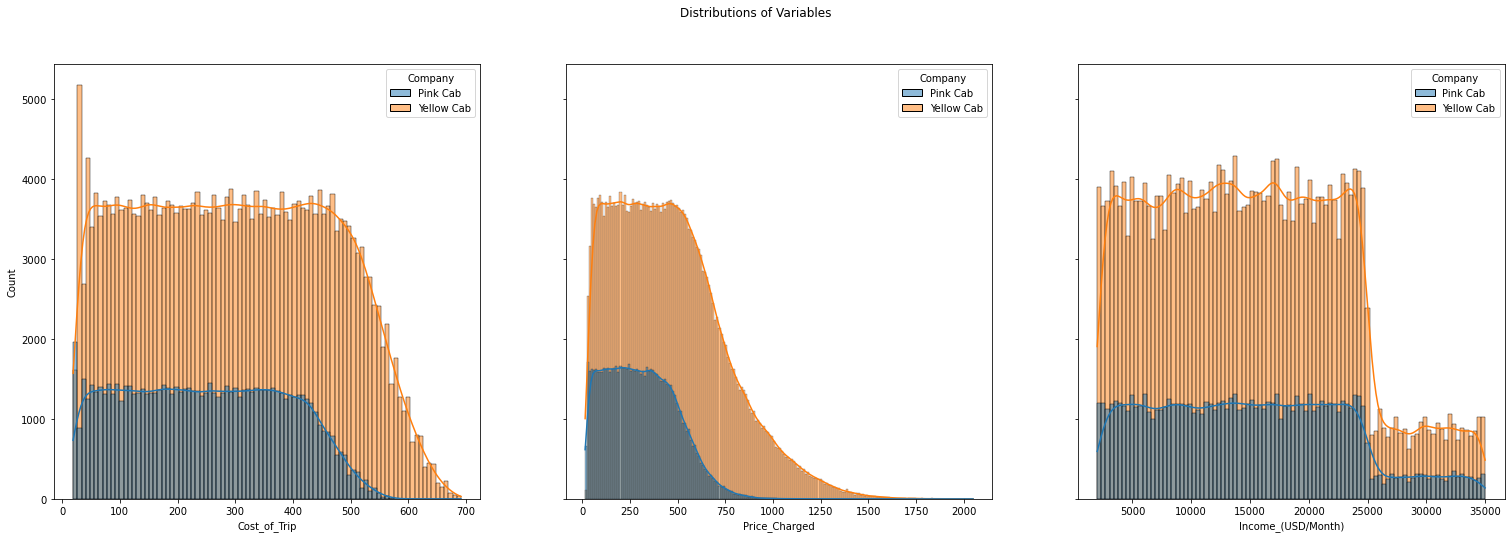

In [142]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 3 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=MasterData , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[2], data=MasterData , x='Income_(USD/Month)' , kde = True , hue="Company") b

<AxesSubplot:xlabel='KM_Travelled', ylabel='Count'>

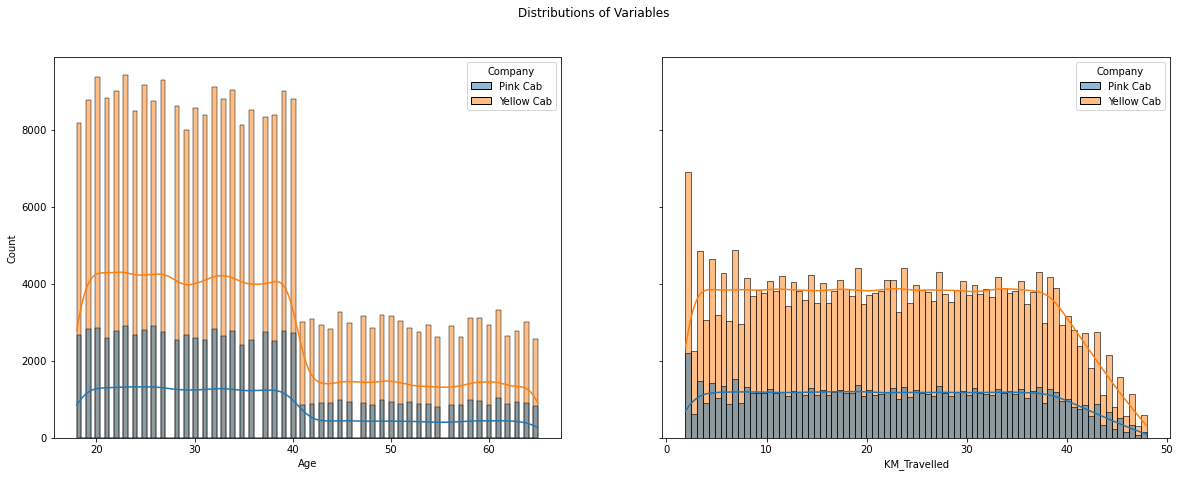

In [146]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 ,figsize=(20,7), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0],data=MasterData , x='Age' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='KM_Travelled' , kde = True , hue="Company")

<AxesSubplot:xlabel='Users', ylabel='Count'>

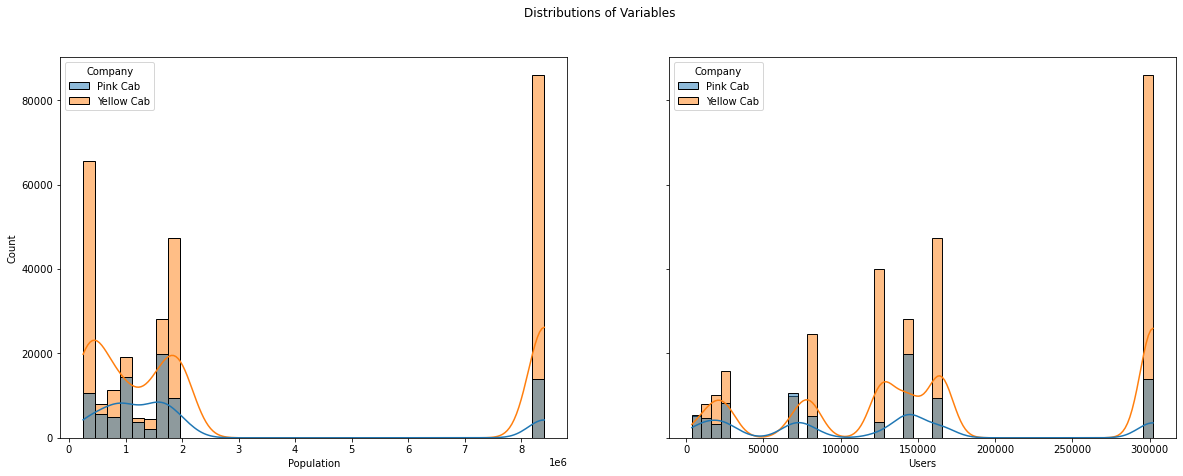

In [147]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 , figsize=(20 ,7), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=MasterData , x='Population' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='Users' , kde = True , hue="Company")

Text(0, 0.5, 'Yellow Cab')

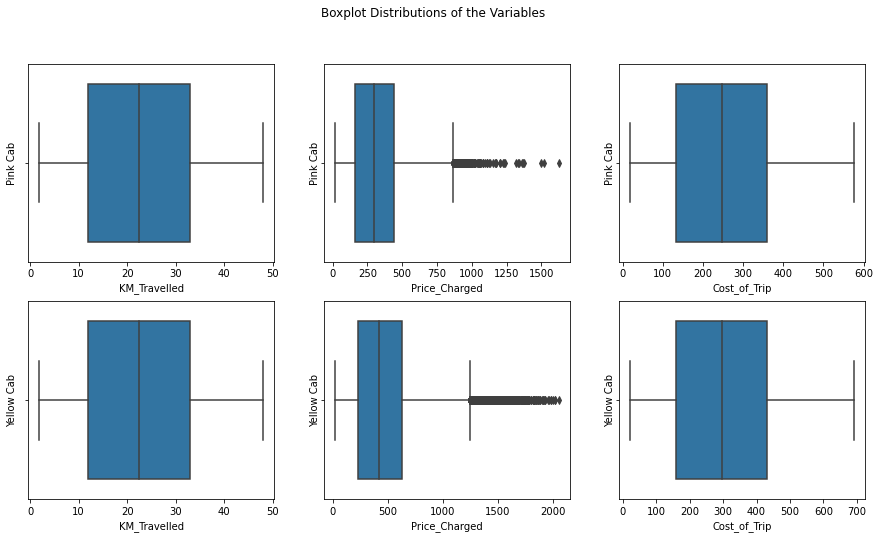

In [58]:
# Boxplot-variables used-KM_Travelled, Price_Charged,Cost_of_Trip
fig,axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=filtered_Pink_MasterData  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,        data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   ,     data=filtered_Yellow_MasterData  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")

#### Outliers¶
#### The price charge range for Yellow cab is more than the Pink cab.

<AxesSubplot:>

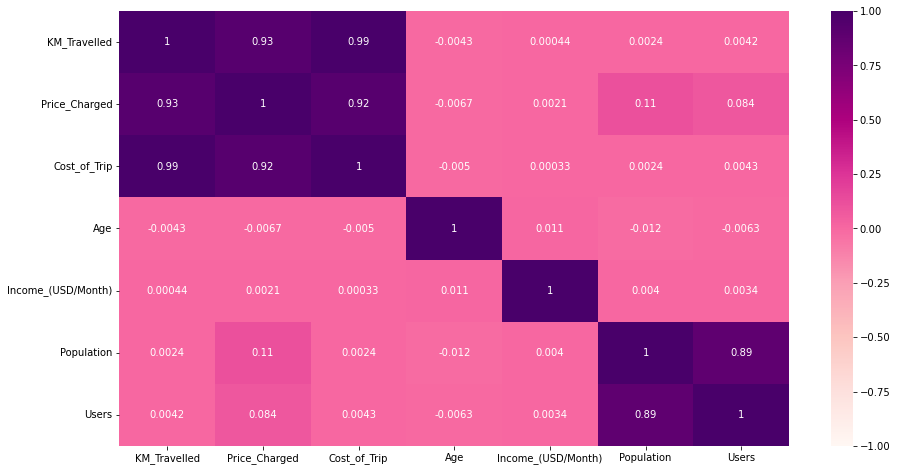

In [59]:
# Pink Cab Correlation Heatmap
Pink_Cab_Corr = filtered_Pink_MasterData.corr()
plt.figure(figsize=(15,8))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='RdPu')

<AxesSubplot:>

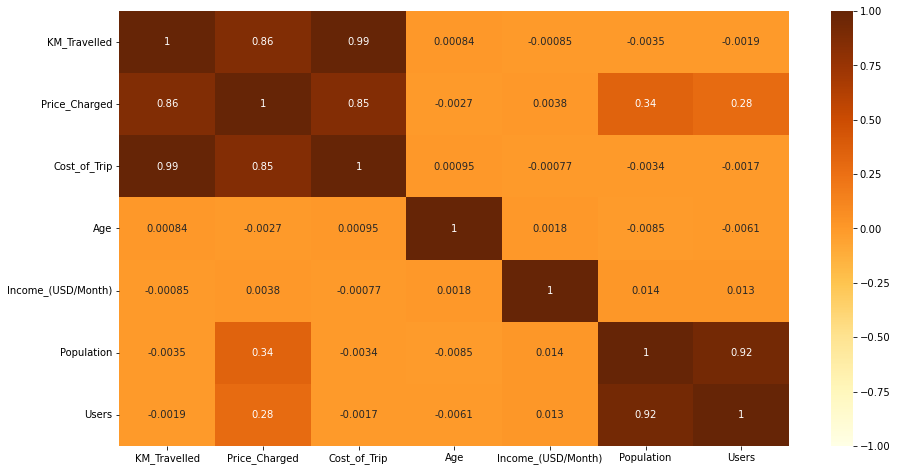

In [60]:
# Yellow Cab Correlation Heatmap
Yellow_Cab_Corr = filtered_Yellow_MasterData.corr()
plt.figure(figsize=(15,8))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='YlOrBr')

C:\Users\innam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\innam\AppData\Local\Temp\ipykernel_3404\2509331991.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
C:\Users\innam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\innam\AppData\Local\Temp\ipykernel_3404\2509331991.py:7: UserWarning: FixedFormatter should only be used together with FixedLoca

[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

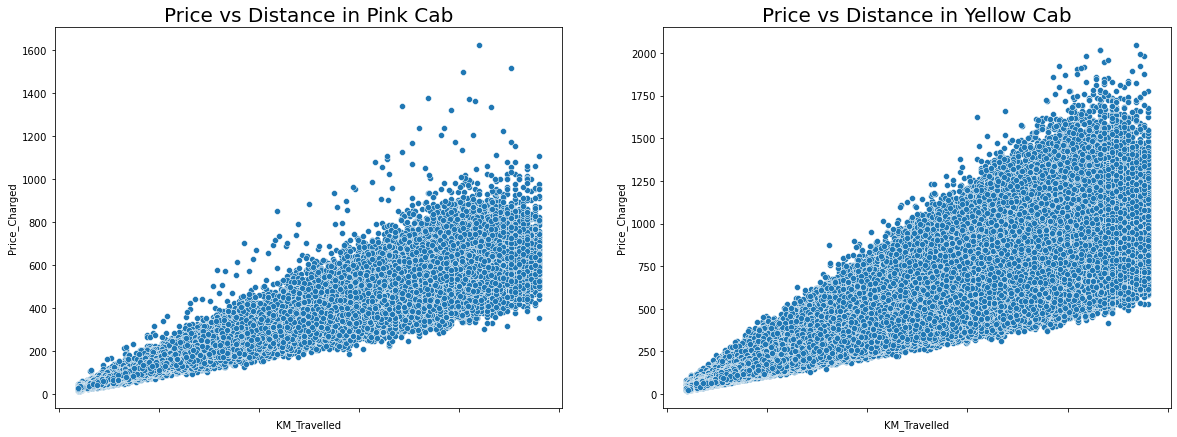

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(filtered_Pink_MasterData['KM_Travelled'], filtered_Pink_MasterData['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(filtered_Yellow_MasterData['KM_Travelled'], filtered_Yellow_MasterData['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

#### There is a positive correlation in the graph for both Pink and Yellow cab
#### The price for Yellow cab is higher compared to Pink cab.

In [62]:
# Obtain Covariance for Master Data
cov1  = np.cov(MasterData['KM_Travelled'],MasterData['Price_Charged'])[0][1]
cov2  = np.cov(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])[0][1]
cov3  = np.cov(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])[0][1]
cov4  = np.cov(MasterData['Users'],MasterData['Population'])[0][1]
cov5  = np.cov(MasterData['Population'],MasterData['Price_Charged'])[0][1]
cov6  = np.cov(MasterData['Users'],MasterData['Price_Charged'])[0][1]

print('Covariance for  KM_Travelled - Price_Charged : '+ str(cov1))
print('Covariance for  KM_Travelled - Cost_of_Trip : '+ str(cov2))
print('Covariance for  Price_Charged - Cost_of_Trip : '+ str(cov3))
print('Covariance for  Users - Population : '+ str(cov4))
print('Covariance for  Population - Price_Charged : '+ str(cov5))
print('Covariance for  Users - Price_Charged : '+ str(cov6))

Covariance for  KM_Travelled - Price_Charged : 2805.307041308074
Covariance for  KM_Travelled - Cost_of_Trip : 1897.7357483737053
Covariance for  Price_Charged - Cost_of_Trip : 37272.94904600304
Covariance for  Users - Population : 306082774585.4572
Covariance for  Population - Price_Charged : 297071855.0581949
Covariance for  Users - Price_Charged : 7777261.839139377


In [33]:
# Pearsons Correlation Coefficients
pcorr_coef1 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Price_Charged'])
pcorr_coef2 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])
pcorr_coef3 , _ = stats.pearsonr(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])
pcorr_coef4 , _ = stats.pearsonr(MasterData['Users'],MasterData['Population'])
pcorr_coef5 , _ = stats.pearsonr(MasterData['Population'],MasterData['Price_Charged'])
pcorr_coef6 , _ = stats.pearsonr(MasterData['Users'],MasterData['Price_Charged'])

print('pearson correlation coefficient for  KM_Travelled - Price_Charged : '+ str(pcorr_coef1))
print('pearson correlation coefficient for  KM_Travelled - Cost_of_Trip : '+ str(pcorr_coef2))
print('pearson correlation coefficient for  Price_Charged - Cost_of_Trip : '+ str(pcorr_coef3))
print('pearson correlation coefficient for  Users - Population : '+ str(pcorr_coef4))
print('pearson correlation coefficient for  Population - Price_Charged : '+ str(pcorr_coef5))
print('pearson correlation coefficient for  Users - Price_Charged : '+ str(pcorr_coef6))

pearson correlation coefficient for  KM_Travelled - Price_Charged : 0.8357531580209405
pearson correlation coefficient for  KM_Travelled - Cost_of_Trip : 0.9818483823189956
pearson correlation coefficient for  Price_Charged - Cost_of_Trip : 0.8598117262915662
pearson correlation coefficient for  Users - Population : 0.9154903444757321
pearson correlation coefficient for  Population - Price_Charged : 0.32658917101926555
pearson correlation coefficient for  Users - Price_Charged : 0.28106053569191186


In [34]:
#Spearmen Rank Correlation Coefficient
spearman_rank_coeff1   = stats.spearmanr(MasterData['KM_Travelled'],MasterData['Price_Charged'])
spearman_rank_coeff2   = stats.spearmanr(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])
spearman_rank_coeff3   = stats.spearmanr(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])
spearman_rank_coeff4   = stats.spearmanr(MasterData['Users'],MasterData['Population'])
spearman_rank_coeff5   = stats.spearmanr(MasterData['Population'],MasterData['Price_Charged'])
spearman_rank_coeff6   = stats.spearmanr(MasterData['Users'],MasterData['Price_Charged'])

print('spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : '+ str(spearman_rank_coeff1))
print('spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : '+ str(spearman_rank_coeff2))
print('spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : '+ str(spearman_rank_coeff3))
print('spearman rank coefficient coefficient for  Users - Population : '+ str(spearman_rank_coeff4))
print('spearman rank coefficient coefficient for  Population - Price_Charged : '+ str(spearman_rank_coeff5))
print('spearman rank coefficient coefficient for  Users - Price_Charged : '+ str(spearman_rank_coeff6))

spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : SpearmanrResult(correlation=0.8929579061229201, pvalue=0.0)
spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : SpearmanrResult(correlation=0.9845458363254255, pvalue=0.0)
spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : SpearmanrResult(correlation=0.9135811393768511, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Population : SpearmanrResult(correlation=0.8742482215995742, pvalue=0.0)
spearman rank coefficient coefficient for  Population - Price_Charged : SpearmanrResult(correlation=0.2075610331422856, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Price_Charged : SpearmanrResult(correlation=0.19826810856694155, pvalue=0.0)


### What's the profit rate of Cab market? Which company has higher profit rate?

<AxesSubplot:xlabel='Profit_per_KM', ylabel='Count'>

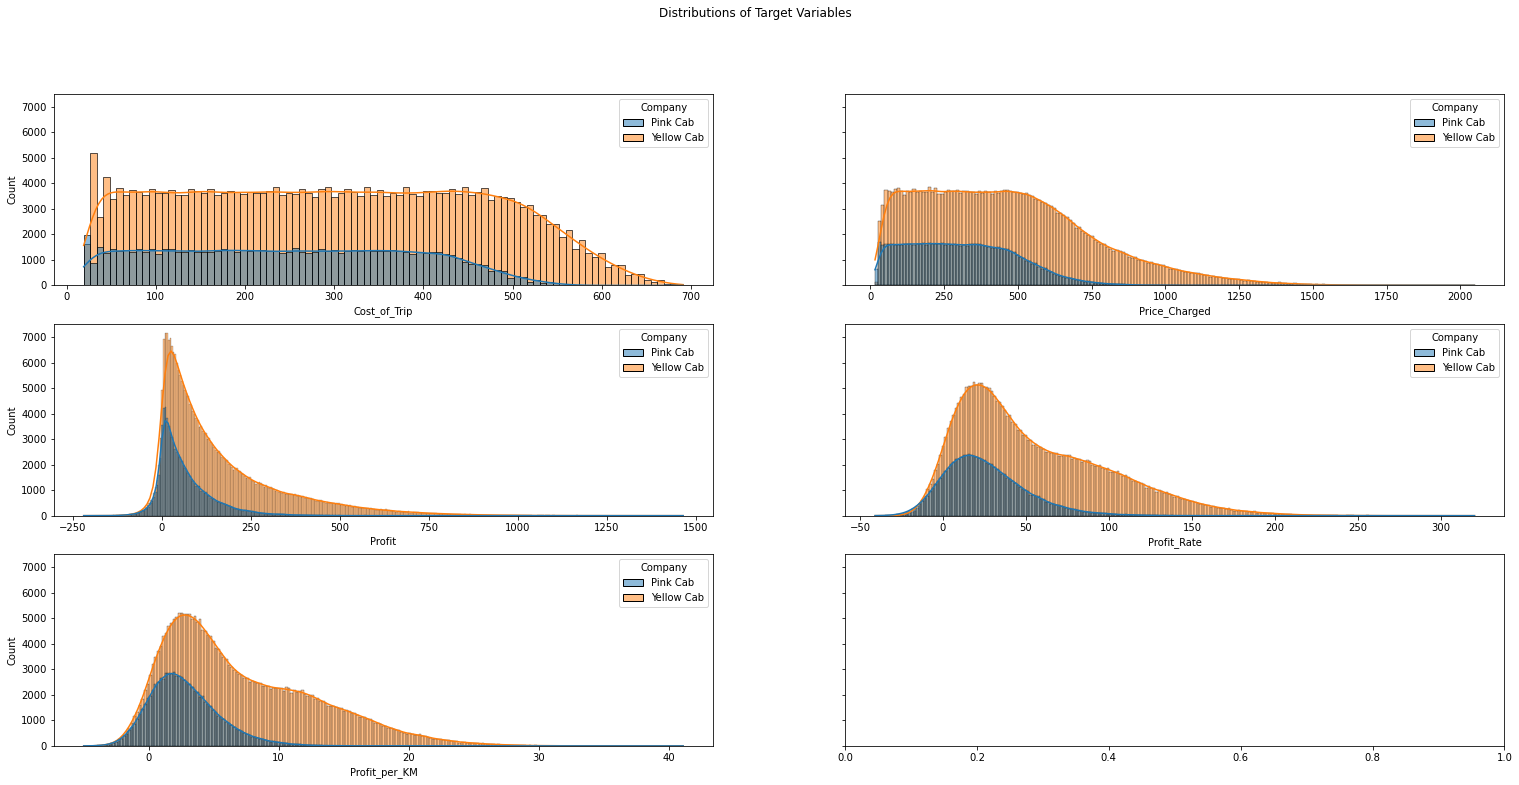

In [63]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=MasterData , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=MasterData  , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=MasterData  , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=MasterData  , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=MasterData  , x='Profit_per_KM' , kde = True , hue="Company")


#### Comparitively Yellow Cabs are skewed towards right implying higher total profit rate

Annual Profit Rate of Cab Market
Company   Pink Cab  Yellow Cab  Cab Market
Year                                      
2016     27.659727   56.719546   50.864915
2017     26.953767   56.683707   50.586278
2018     21.427914   48.213674   42.691567


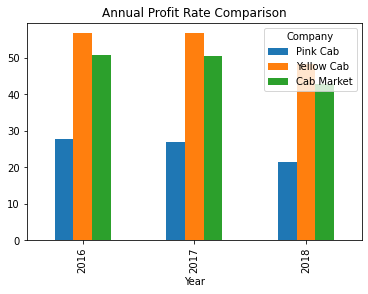

In [65]:
Annual_Profit_Rate = MasterData.groupby(['Year','Company']).Profit.sum().unstack()/MasterData.groupby(['Year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = MasterData.groupby(['Year']).Profit.sum()/MasterData.groupby(['Year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
plt.show()

#### Yellow Cab has higher yearly profit

### Does Yellow Cab have bigger market share than Pink Cab?

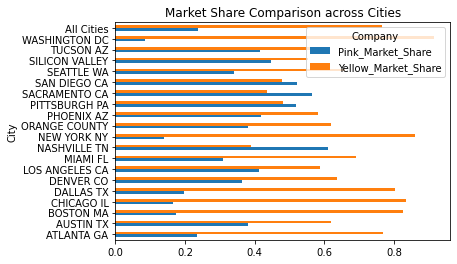

In [80]:
Company_Transaction = MasterData.groupby(['City','Company']).Transaction_ID.count().unstack()
Company_Transaction.loc['All Cities'] = Company_Transaction.sum(numeric_only=True)
Company_Transaction['City_Market'] = Company_Transaction['Pink Cab'] + Company_Transaction['Yellow Cab']
Company_Transaction['Pink_Market_Share'] = Company_Transaction['Pink Cab']/Company_Transaction['City_Market']
Company_Transaction['Yellow_Market_Share'] = Company_Transaction['Yellow Cab']/Company_Transaction['City_Market']
ax = Company_Transaction.iloc[:,3:5].plot(kind='barh',stacked = False, title = 'Market Share Comparison across Cities')
plt.show()

#### Yellow cab market share is three times greater than Pink Cab

### Do Customers prefer Yellow Cab to Pink Cab?

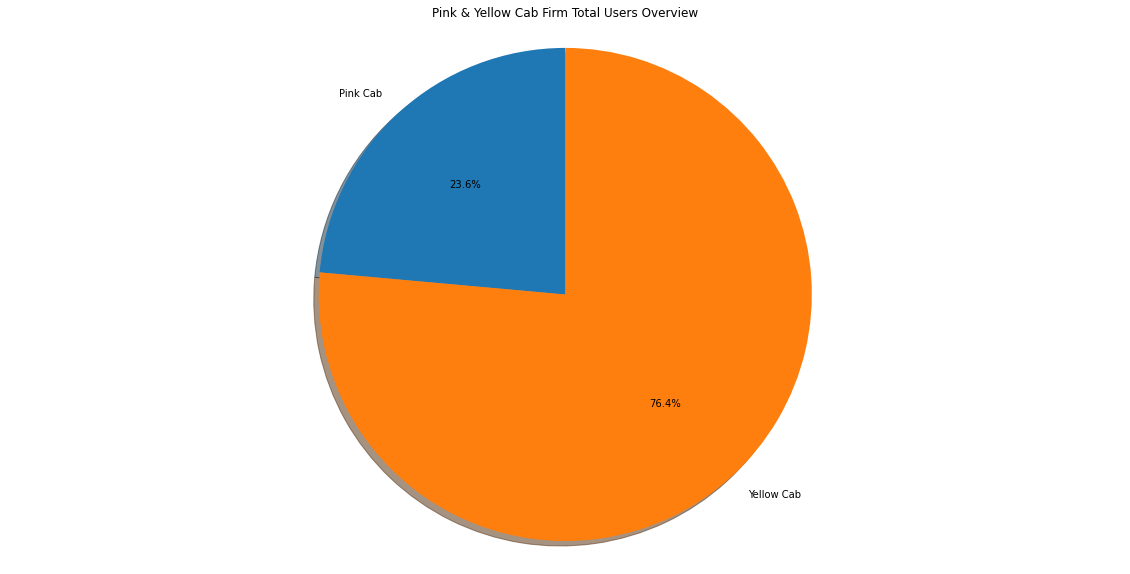

In [74]:
data0 = MasterData.groupby("Company").Users.count()
labs = data0.index
vals = data0.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Pink & Yellow Cab Firm Total Users Overview')
plt.show()

#### Customers prefers yellow cabs. The number of users of Yellow Cab is  3 times that of Pink Cab approximately.

###  Who serves the higher income?

Text(0, 0.5, 'Yellow Cab')

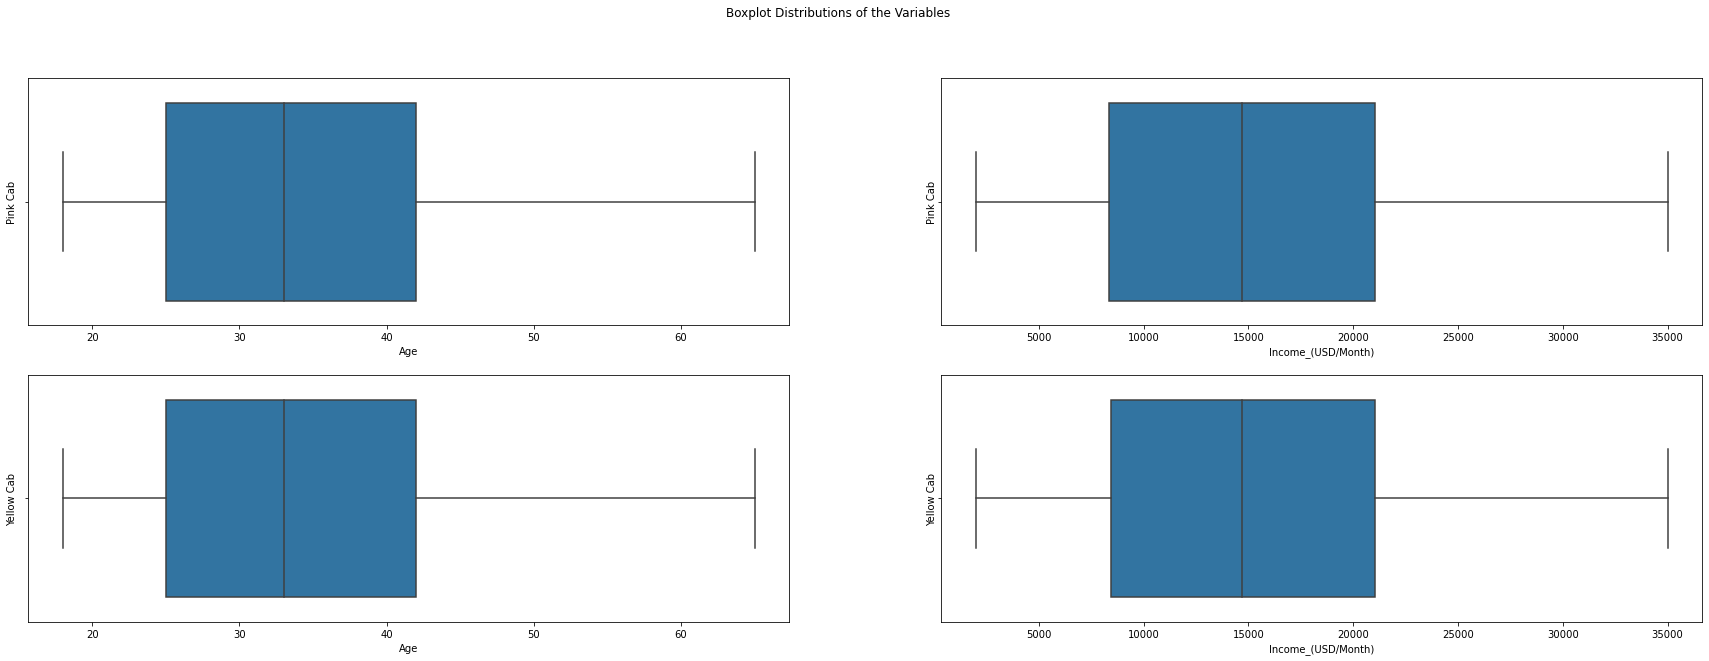

In [93]:
fig,axes = plt.subplots(2,2, figsize=(30,10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,                 data=filtered_Pink_MasterData).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,          data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,                 data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,         data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")

#### As per above box plot Pink Cab and Yellow Cab serve similar income.

## Which company prevail in which city?

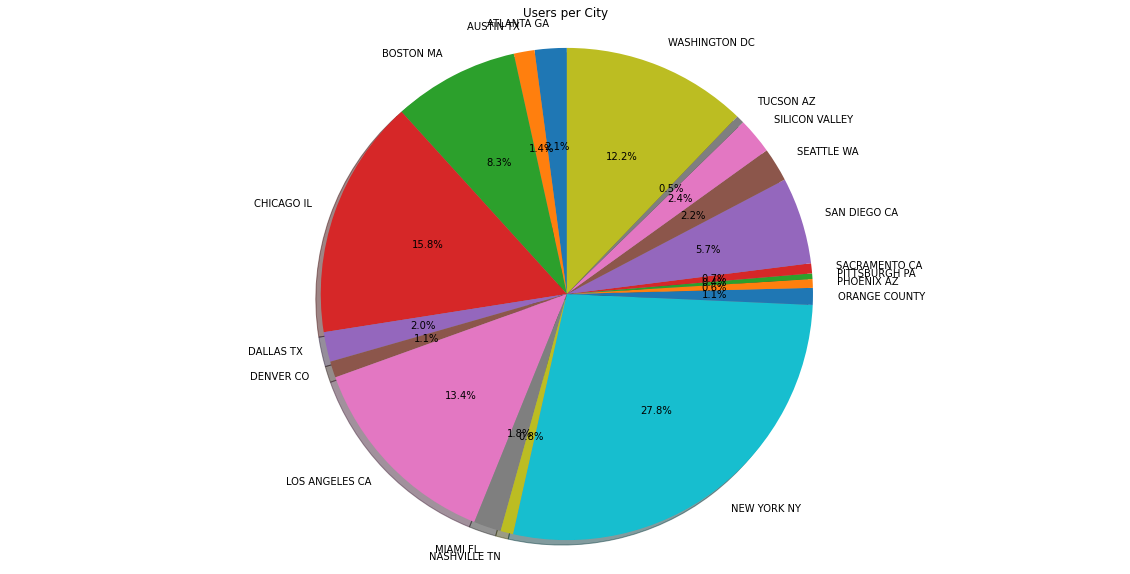

In [98]:
city_y = MasterData[MasterData.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()


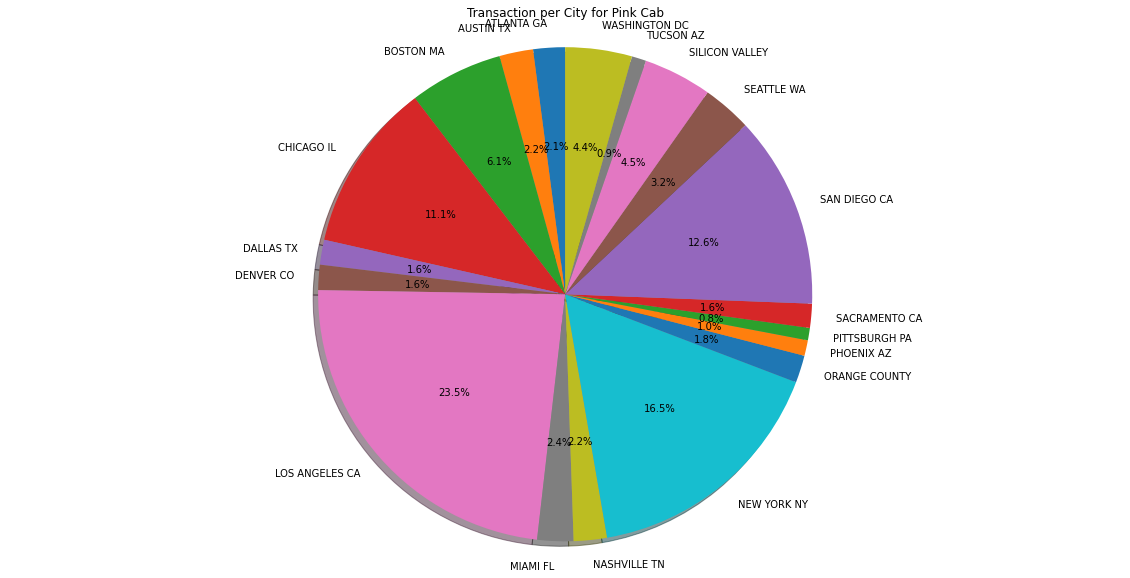

In [100]:
city_p = MasterData[MasterData.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

####  Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%
#### Transaction for Pink Cab is highest in Los Angeles City


 ### Does margin proportionally increase with increase in number of customers?

In [104]:
MasterData['Margins'] = (MasterData['Price_Charged']-MasterData['Cost_of_Trip'])
MasterData.head()


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Year,Month,Profit,Profit_Rate,Profit_per_KM,User_Ratio,Year_of_Travel,Month_of_Travel,Day_of_Travel,Margins
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,2016,1,57.3150,18.274427,1.882266,3.031225,2016,1,8,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,2018,7,281.2772,88.612790,10.739870,3.031225,2018,7,21,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,2018,11,194.6480,32.582415,4.574571,3.031225,2018,11,23,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,2016,1,23.6660,7.067558,0.826904,3.031225,2016,1,6,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,2018,4,253.9808,54.371732,6.981330,3.031225,2018,4,21,253.9808


In [139]:
df = MasterData[['Price_Charged','Cost_of_Trip','Age','Margins','Users']]
df.corr()

,Price_Charged,Cost_of_Trip,Age,Margins,Users
Price_Charged,1.000000,0.859812,-0.003084,0.864154,0.281061
Cost_of_Trip,0.859812,1.000000,-0.000189,0.486056,0.023628
Age,-0.003084,-0.000189,1.000000,-0.005093,-0.005906
Margins,0.864154,0.486056,-0.005093,1.000000,0.457758
Users,0.281061,0.023628,-0.005906,0.457758,1.000000


<AxesSubplot:>

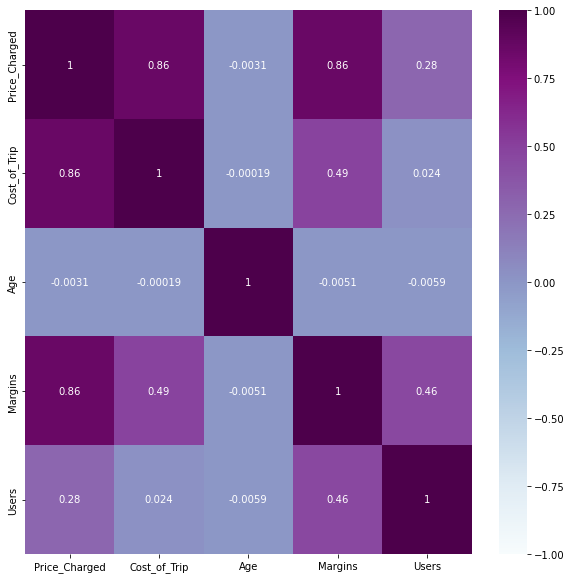

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='BuPu')

#### There is a correlation between Margin & Price Charged

### Is there any difference in Margins for Customers based on Genders?

#### Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [150]:
a = MasterData[(MasterData.Gender=='Female')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Gender=='Male')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


#### Yellow Cab: There is difference in Margin between Male and Female customers

In [151]:
#For Pink Cabs
a = MasterData[(MasterData.Gender=='Female')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Gender=='Male')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


#### #Pink Cab: There is no difference in Margin between Male and Female customers

### Is there diffrence in Margins based on Age Group?

In [153]:
#Margins per Age
MasterData[MasterData.Age<=50].groupby('Company').Margins.mean()

Company
Pink Cab       62.765586
Yellow Cab    161.081921
Name: Margins, dtype: float64

In [154]:
MasterData[MasterData.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [155]:
#Pink Cab
a = MasterData[(MasterData.Age<=50)&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Age>50)&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [157]:
#Yellow Cab
a = MasterData[(MasterData.Age<=50)&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Age>50)&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09


#### There are diffrences in Margin based on Age for Yellow Cab

### Is there difference in margins for Card payer and Cash payers?

In [159]:
#Pink Cab
a = MasterData[(MasterData.Payment_Mode=='Cash')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Payment_Mode=='Card')&(MasterData.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [160]:
#Yellow Cab
a = MasterData[(MasterData.Payment_Mode=='Cash')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = MasterData[(MasterData.Payment_Mode=='Card')&(MasterData.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


#### There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab

### Time Series Analysis

In [161]:
MasterData['Year_of_Travel'] = MasterData['Date_of_Travel'].dt.year
MasterData['Month_of_Travel'] = MasterData['Date_of_Travel'].dt.month
MasterData['Day_of_Travel'] = MasterData['Date_of_Travel'].dt.day

MasterData_TimeSeries=MasterData.set_index('Date_of_Travel')
MasterData_TimeSeries.head(10)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,...,Year,Month,Profit,Profit_Rate,Profit_per_KM,User_Ratio,Year_of_Travel,Month_of_Travel,Day_of_Travel,Margins
Date_of_Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-08,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,...,2016,1,57.3150,18.274427,1.882266,3.031225,2016,1,8,57.3150
2018-07-21,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,...,2018,7,281.2772,88.612790,10.739870,3.031225,2018,7,21,281.2772
2018-11-23,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,...,2018,11,194.6480,32.582415,4.574571,3.031225,2018,11,23,194.6480
2016-01-06,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,...,2016,1,23.6660,7.067558,0.826904,3.031225,2016,1,6,23.6660
2018-04-21,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,...,2018,4,253.9808,54.371732,6.981330,3.031225,2018,4,21,253.9808
2018-05-04,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,...,2018,5,50.8912,58.155523,8.234822,3.031225,2018,5,4,50.8912
2018-10-27,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,...,2018,10,25.0960,17.681458,1.874235,3.031225,2018,10,27,25.0960
2016-01-02,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,...,2016,1,27.5680,28.236644,3.049558,3.031225,2016,1,2,27.5680
2016-09-21,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,...,2016,9,210.0920,42.510846,5.305354,3.031225,2016,9,21,210.0920


### Which company has maximum cab users at a particular time period?

In [162]:
Customer_MasterData_2 = CabData.merge(TransactionID, on= 'Transaction ID').merge(CustomerID, on ='Customer ID')
Customer_MasterData_2['Year'] = Customer_MasterData_2['Date of Travel'].dt.year
Customer_MasterData_2 = Customer_MasterData_2[['Company', 'Customer ID','Year']]
Customer_MasterData_2 = Customer_MasterData_2.drop_duplicates()
Yellow_Customer_Merged_Data = Customer_MasterData_2[Customer_MasterData_2['Company'] == "Yellow Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Pink_Customer_Merged_Data = Customer_MasterData_2[Customer_MasterData_2['Company'] == "Pink Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Customer_Loyalty = Customer_MasterData_2.groupby(['Customer ID','Year']).count().unstack()
#tmp = Customer_Loyalty[Customer_Loyalty['Company' == "Yellow Cab"]]
print("Customer Number of Yellow Cab")
print(Yellow_Customer_Merged_Data)
print("Customer Number of Pink Cab")
print(Pink_Customer_Merged_Data)
seq = np.arange(0.1,1,0.1)
print(Customer_Loyalty.describe(seq))

Customer Number of Yellow Cab
      Customer ID
Year             
2016        25937
2017        27789
2018        27470
Customer Number of Pink Cab
      Customer ID
Year             
2016        16661
2017        18643
2018        18400
            Company                            
Year           2016          2017          2018
count  31152.000000  33418.000000  32938.000000
mean       1.367424      1.389431      1.392616
std        0.482111      0.487629      0.488340
min        1.000000      1.000000      1.000000
10%        1.000000      1.000000      1.000000
20%        1.000000      1.000000      1.000000
30%        1.000000      1.000000      1.000000
40%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
60%        1.000000      1.000000      1.000000
70%        2.000000      2.000000      2.000000
80%        2.000000      2.000000      2.000000
90%        2.000000      2.000000      2.000000
max        2.000000      2.000000      2.0

#### From the above data Yellow Data has maximum users in 2017

### According to the analysis, we recommend XYZ company to invest in Yellow Cab.

In [164]:
MasterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Customer_ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income_(USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no